In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wf
import jax.numpy as jnp

In [63]:
%cd "C://Users//TRETEC//Documents//MVA//S1//[IPGM] Introduction to probabilistic graphical models//Projet//independent_component_analysis"
from mva_independent_component_analysis.utils.preprocessing import centering_and_whitening
from mva_independent_component_analysis.fast_ica.fastica_numpy import fast_ica
from mva_independent_component_analysis.utils.mix_sources import mix_sources
%cd experiments/exp2_speech

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis
C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp2_speech


# Importing speech signals and mixing them

In [64]:
s5_file='input/child-talking-theres-a-daddy.wav'
s4_file='input/talk-to-the-cashier-in-a-hardware-store.wav'
s3_file='input/mathias-words-request.wav'

In [65]:
sampling_rate_3, s3 = wf.read(s3_file)
print(s3.shape)
s3 = s3[:,0]

sampling_rate_4, s4 = wf.read(s4_file)
print(s4.shape)
s4 = s4[:,0]

sampling_rate_5, s5 = wf.read(s5_file)
print(s5.shape)

(682489, 2)
(1910016, 2)
(843972,)


C:\Users\TRETEC\AppData\Local\Temp\ipykernel_23832\3925245323.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate_3, s3 = wf.read(s3_file)


In [66]:
S=[s3,s4,s5]
S, X, Xw = mix_sources(S, False)
wf.write('./talks_mixture.wav', sampling_rate_5, X.mean(axis=0).astype(np.float32))

# ICA

In [67]:
W, mcc = fast_ica(Xw, 1, 1e-8, 5000, true_sources=S) #Nour's method.

component 0


iteration : 0 : distance 0.07758462429046631
----- MCC = 0.33403113019934
iteration : 1 : distance 0.002612292766571045
----- MCC = 0.6649717514713606
iteration : 2 : distance 1.1920928955078125e-07
----- MCC = 0.6680607423186302
iteration : 3 : distance 0.0
----- MCC = 0.6680607621868452
component 1
iteration : 0 : distance 0.25950759649276733
----- MCC = 0.6680619940161705
iteration : 1 : distance 0.2112741470336914
----- MCC = 0.6680535698930422
iteration : 2 : distance 0.0573919415473938
----- MCC = 0.6674620533982912
iteration : 3 : distance 0.0012441277503967285
----- MCC = 0.35664746165275574
iteration : 4 : distance 0.0
----- MCC = 0.6673387160990387
component 2
iteration : 0 : distance 0.277149498462677
----- MCC = 0.6673386962308238
iteration : 1 : distance 0.0
----- MCC = 0.6673386962308238


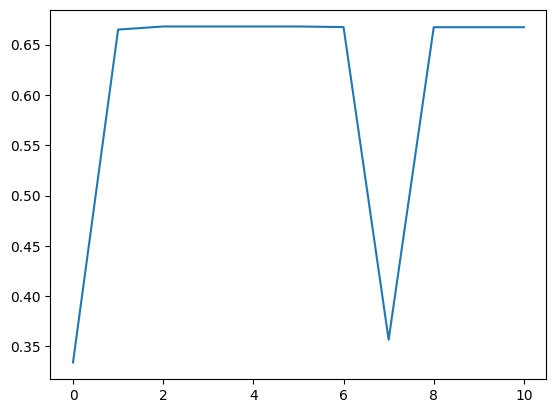

In [68]:
plt.plot(mcc)

In [69]:
unMixed = np.dot(W,Xw)


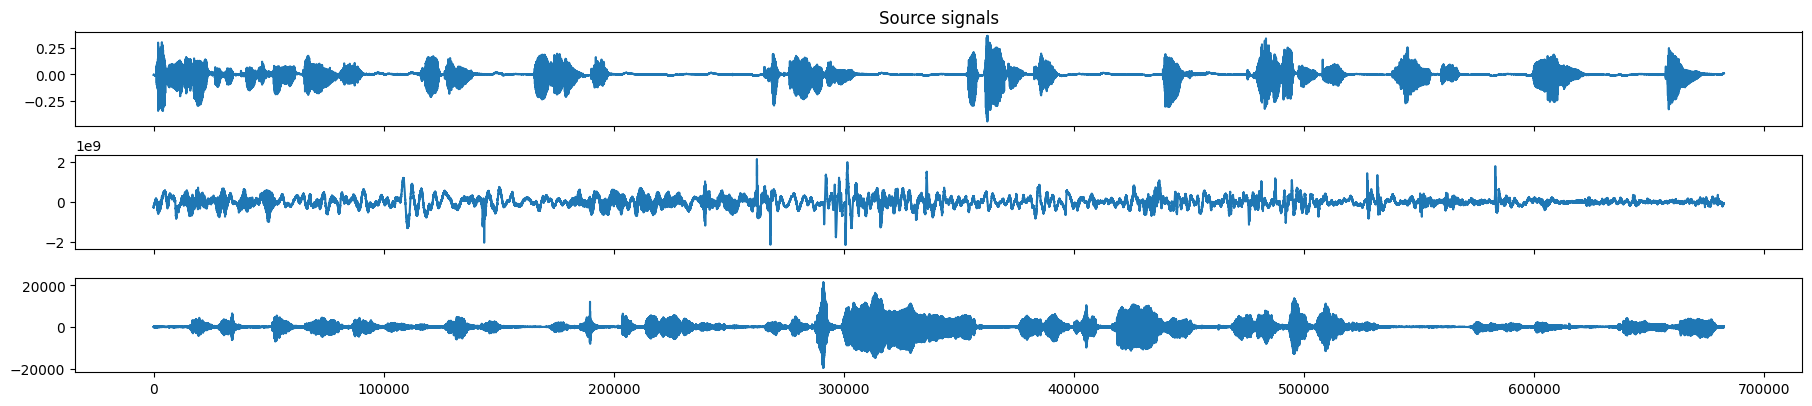

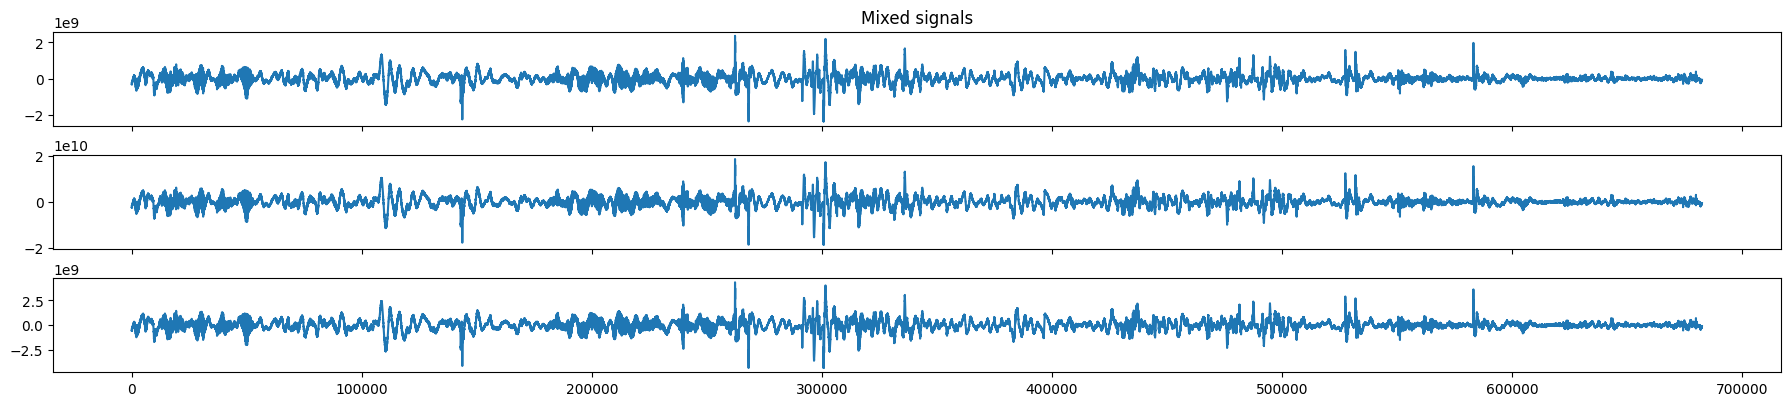

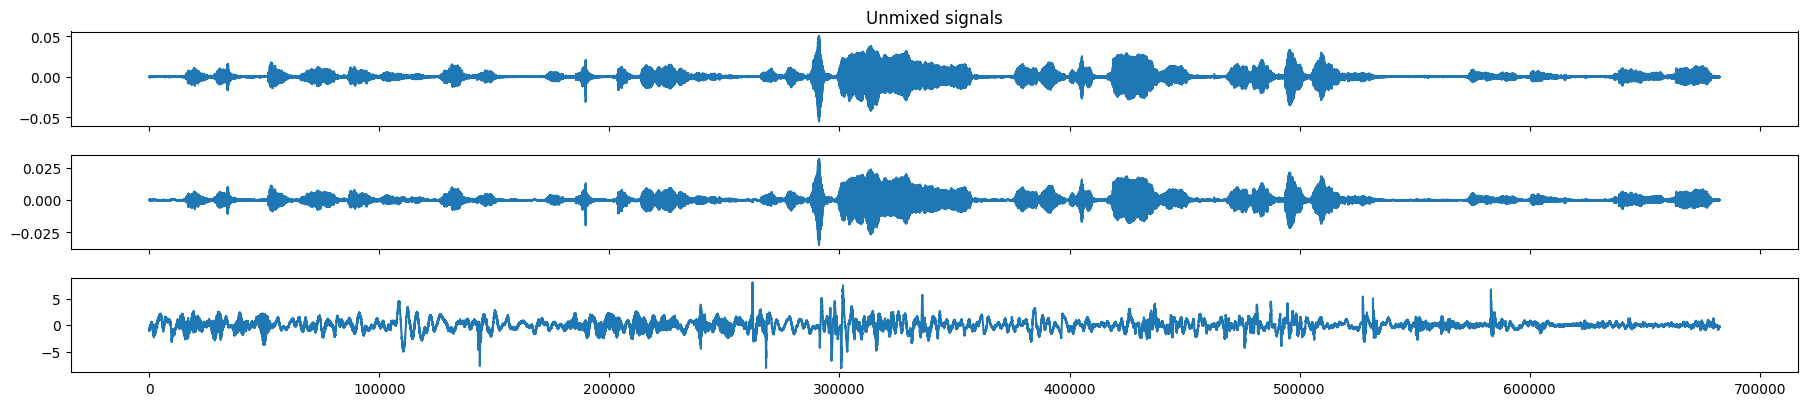

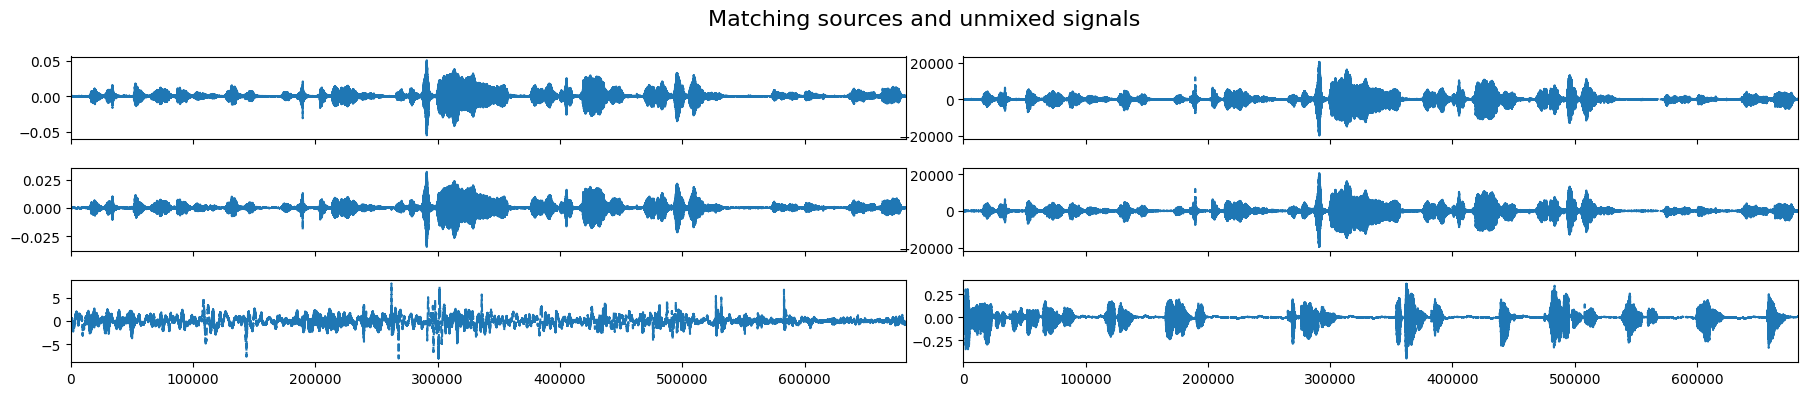

In [72]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)
perm = jnp.argmax(jnp.abs(unMixed @ S.T),
                    axis=0)

fig, axes = plt.subplots(nrows=n_signals, ncols=2, figsize=(18, 4),sharex=True)
fig.suptitle('Matching sources and unmixed signals', fontsize=16)
fig.tight_layout()
for i in range(n_signals):
    axes[i,0].plot(unMixed[i,:].T,'--')
    axes[i,1].plot(S[perm[i]].T,'--')
    plt.xlim(0, S.shape[1])


In [53]:
%cd experiments/exp2_speech

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp2_speech


In [39]:
wf.write('output/s3_predicted.wav', sampling_rate_5, unMixed[0].astype(np.float32))
wf.write('output/s4_predicted.wav', sampling_rate_5, unMixed[1].astype(np.float32))
wf.write('output/s5_predicted.wav', sampling_rate_5, unMixed[2].astype(np.float32))

## Saving plot in .tex format

In [ ]:
%cd ../..

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis


In [ ]:
# LaTeX code for the subplot
subplot_code_ = r'''
\nextgroupplot[
        title=Evolution of MCC during FastICA algorithm iterations on real speech data,
        xlabel={iterations},
        ylabel={MCC Score},
        xmin=0, xmax=%d,
        ymin=%f, ymax=%f
        ]
\addplot[
    color=blue,
] coordinates {
    %s
};
''' % (len(mcc)-1, min(mcc)-0.1, 1, ' '.join(f'({i},{score:.2f})' for i, score in enumerate(mcc)))

# Save the LaTeX code to a file
file_path = 'report/figures_latex/mcc_speech_fastica_withoutscaling.tex'  # Path to save the .tex file
with open(file_path, 'w') as file:
    file.write(subplot_code_.strip())


# Scaling sources before applying mixing

The signal that has very low amplitude is not recovered. We try again but this time we ensure the scaling is the same for all sources the sources beforehand : 

In [73]:
S, X, Xw = mix_sources(S)
W,mcc = fast_ica(Xw, 1, 1e-8, 5000,true_sources=S) #Nour's method.
unMixed = np.dot(W,Xw)


component 0
iteration : 0 : distance 0.07071340084075928
----- MCC = 0.7198056181271871
iteration : 1 : distance 0.010750651359558105
----- MCC = 0.7234792510668436
iteration : 2 : distance 3.8743019104003906e-05
----- MCC = 0.7234870791435242
iteration : 3 : distance 1.3113021850585938e-06
----- MCC = 0.7234875758488973
iteration : 4 : distance 0.0
----- MCC = 0.7234875361124674
component 1
iteration : 0 : distance 0.22409260272979736
----- MCC = 0.8068095644315084
iteration : 1 : distance 0.005977988243103027
----- MCC = 0.8099814256032308
iteration : 2 : distance 0.00036019086837768555
----- MCC = 0.8101511597633362
iteration : 3 : distance 1.3649463653564453e-05
----- MCC = 0.8101561665534973
iteration : 4 : distance 4.172325134277344e-07
----- MCC = 0.8101561268170675
iteration : 5 : distance 5.960464477539063e-08
----- MCC = 0.8101560870806376
iteration : 6 : distance 5.960464477539063e-08
----- MCC = 0.8101560870806376
component 2
iteration : 0 : distance 0.5699409544467926
----

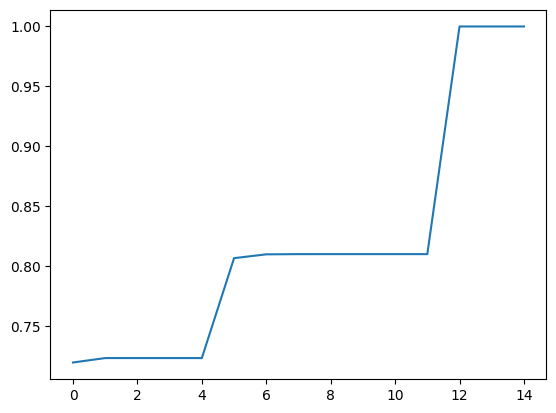

In [74]:
plt.plot(mcc)

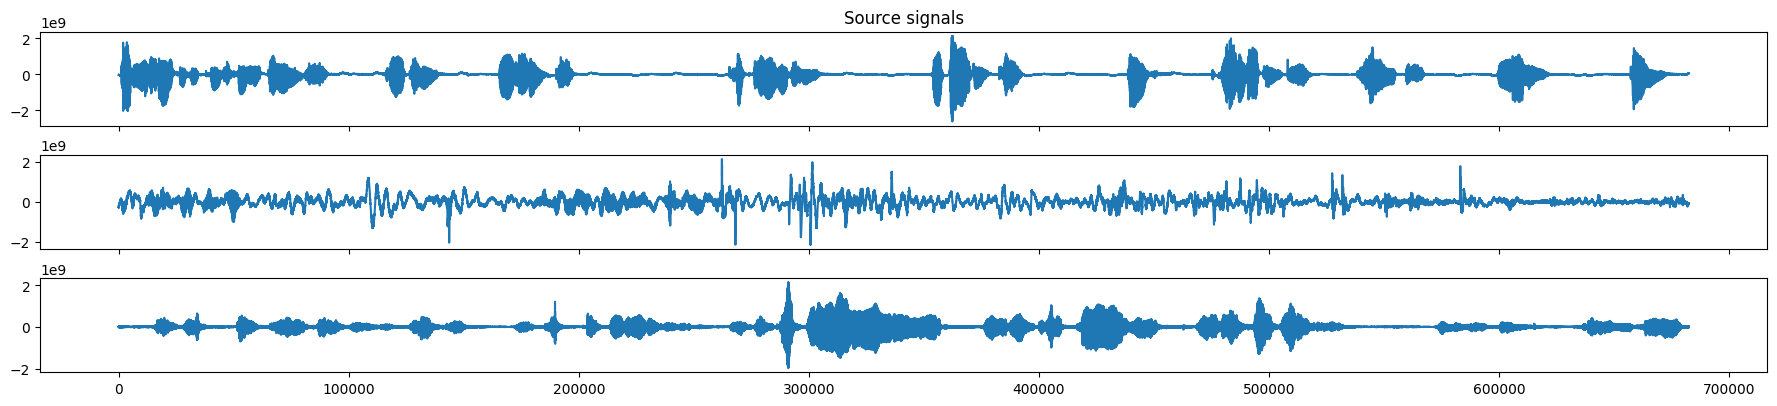

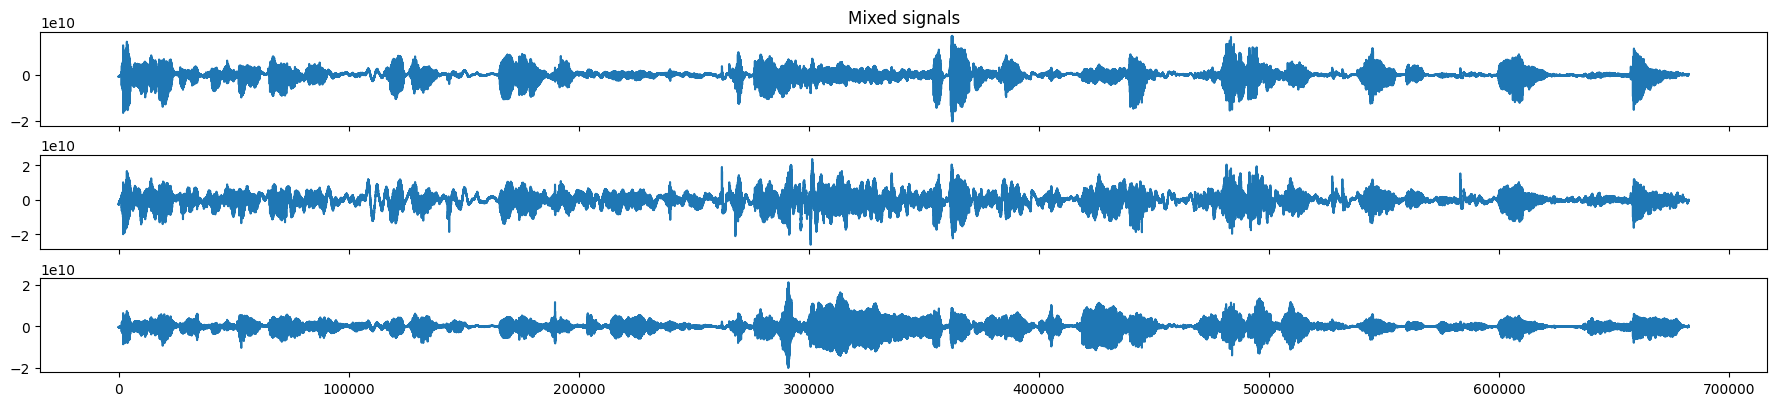

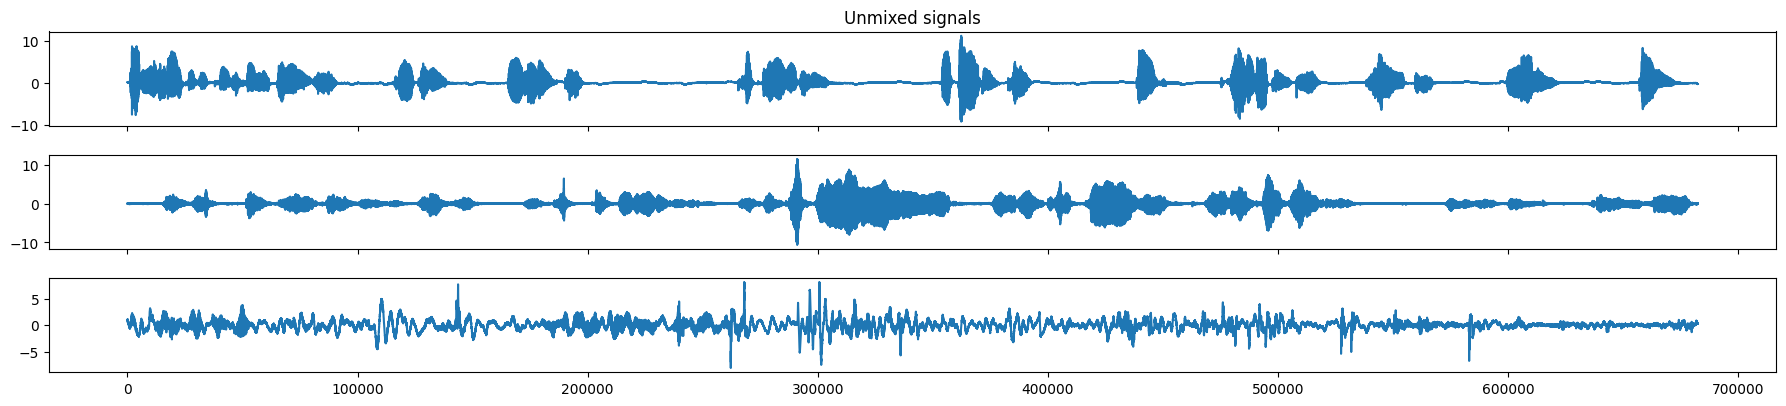

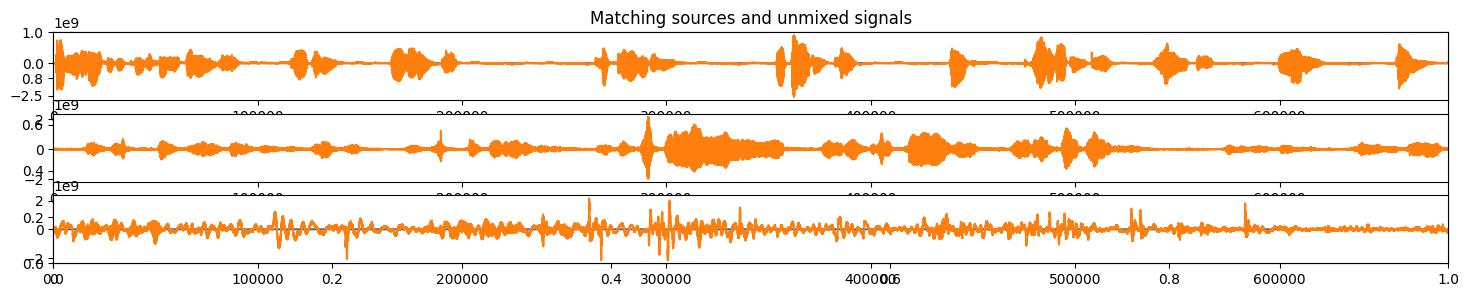

In [75]:
n_signals = X.shape[0]
# Plot input signals (not mixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Source signals')
for i in range(n_signals):
    axes[i].plot(S[i])

# Plot mixed signals 
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Mixed signals')
for i in range(n_signals):
    axes[i].plot(X[i])


# Plot recovered signals (unmixed)
fig, axes = plt.subplots(nrows=n_signals, ncols=1, figsize=(18, 4),sharex=True)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
axes[0].set_title('Unmixed signals')
for i in range(n_signals):
    axes[i].plot(unMixed[i])

Sw, _, _ = centering_and_whitening(S)

plt.figure(figsize=(18,3))
plt.title("Matching sources and unmixed signals")
for i in range(X.shape[0]):
    perm = np.argmax(np.abs(unMixed[i,:] @ Sw.T))
    plt.subplot(n_signals,1,i+1)
    plt.plot(unMixed[i,:].T)
    plt.plot(S[perm].T)
    plt.xlim(0, S.shape[1])
    # ax.set_ylim(-1.5, 1.5)


In [77]:
%cd experiments/exp2_speech

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\experiments\exp2_speech


In [78]:
wf.write('output/s3_predicted.wav', sampling_rate_5, unMixed[0].astype(np.float32))
wf.write('output/s4_predicted.wav', sampling_rate_5, unMixed[1].astype(np.float32))
wf.write('output/s5_predicted.wav', sampling_rate_5, unMixed[2].astype(np.float32))

In [81]:
%cd ../..

C:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis


c:\Users\TRETEC\Documents\MVA\S1\[IPGM] Introduction to probabilistic graphical models\Projet\independent_component_analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [82]:
# LaTeX code for the subplot
subplot_code_ = r'''
\nextgroupplot[
        title=Evolution of MCC during FastICA algorithm iterations on real speech data,
        xlabel={iterations},
        ylabel={MCC Score},
        xmin=0, xmax=%d,
        ymin=%f, ymax=%f
        ]
\addplot[
    color=blue,
] coordinates {
    %s
};
''' % (len(mcc)-1, min(mcc)-0.1, 1, ' '.join(f'({i},{score:.2f})' for i, score in enumerate(mcc)))

# Save the LaTeX code to a file
file_path = 'report/figures_latex/mcc_speech_fastica.tex'  # Path to save the .tex file
with open(file_path, 'w') as file:
    file.write(subplot_code_.strip())


In [83]:
n_sources=S.shape[0]